[text my one note book ](<https://manishkumarmj-my.sharepoint.com/personal/manishkumarmj_manishkumarmj_onmicrosoft_com/_layouts/Doc.aspx?sourcedoc={626C747B-3237-4716-9794-7E35EAA3805C}&wd=target%28machine%20learnin.one%7C5F67B768-8BC7-401D-ADD1-344879490C11%2FD24%20Feature%20Scaling%7C8E2199E8-1932-4A8F-876B-F4616E9751EF%2F%29&wdpartid={416DE300-D34E-0B7E-0FDA-5DD0A4D11434}{1}&wdsectionfileid={E8FE28D4-FFE9-4370-928A-1E17054CF57F}>)



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')


# iloc 
-->df.iloc[rows, columns]
.iloc[  row start :row end, column start : column end     ]

In [4]:
df=df.iloc[:,2:] # yaha pe row pura hai and column 2 to last

In [5]:
df.sample(50)

,Age,EstimatedSalary,Purchased
206,55,130000,1
285,37,93000,1
299,46,117000,1
133,21,68000,0
395,46,41000,1
25,47,20000,1
265,42,108000,1
213,35,58000,0
205,47,47000,0
160,32,100000,1


# train/test split  
Import train/test split function -->   
* Splits data into random train and test subsets.
* evalue the the unseen data 

### df.drop('Purchased', axis=1):  
 * Features (X) - all columns except 'Purchased'  
### df['Purchased']:
 * Target (y) - only the 'Purchased' column  
### test_size=0.3 
 * only 30 % of test size 
 

# random_state
* controls the shuffling of data before splitting.
###### why this ?
* With random_state=0:
    * Same shuffle pattern every time  
    * Identical train/test splits across runs
    * Ensures consistent results


# df.drop('Purchased', axis=1) creates feature matrix X by removing the target column.

    *'Purchased': Column to drop
    * axis=1: Drop column (not row)

In [6]:
from sklearn.model_selection import train_test_split  # Import train/test split function
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [7]:
X_train.sample(3)

,Age,EstimatedSalary
393,60,42000
381,48,33000
99,28,37000


In [8]:
X_test.sample(3)

,Age,EstimatedSalary
344,47,105000
14,18,82000
54,27,58000


# why we use train test split ?
* To reduce the chances of overfitting by splitting data into a training subset and a testing subset.

| Without Split | With Split |
|:--------------|-----------:|
| Train and test on same data | Train on one set (X_train, y_train) |
| Model may memorize data (overfit) | Test on unseen set (X_test, y_test) |
| High training accuracy, poor real-world performance | Measures how well model generalizes |


## Analogy:

    * Practice exam (train) vs Final exam (test)
    * Tests true understanding, not memorization


# Student Example:

        * Train set: Practice problems with answers (learn patterns)

        * Test set: Final exam without answers (test true understanding)

        * If student only memorizes practice problems, they fail the final exam. Train/test split catches this.
**If student only memorizes practice problems, they fail the final exam. Train/test split catches this.**






# StandaradScaler
it basically use formula 

<img src="./Fig_2.png" alt="My Image" style="width: auto; height: auto;">


# standrad devaition 
* it will make valeu centred to (0 , 0 )
* mean centering 

<img src="./Fig_3.png" alt="My Image" style="width: auto; height: auto;">


upper wala formula kud se use kar lega

        * StandardScaler ka object bana 
        * x train se sikke ke value kasse hai


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # StandardScaler ka object bana 

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train) # it will sotre the mean of the x age and x mean 

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [11]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


after conversition it will give me numpy arrray 

# Scaled  the data ( mean centre )

In [12]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [13]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# descrbe function  
X_train data ( original data )

In [14]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


# descrbe function  on scalled data 
X_train data ( scalled data )

In [ ]:
np.round(X_test_scaled.describe(),1)
# note that all point centred to zero (0,0)


,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


# after Scallig mean is centred 


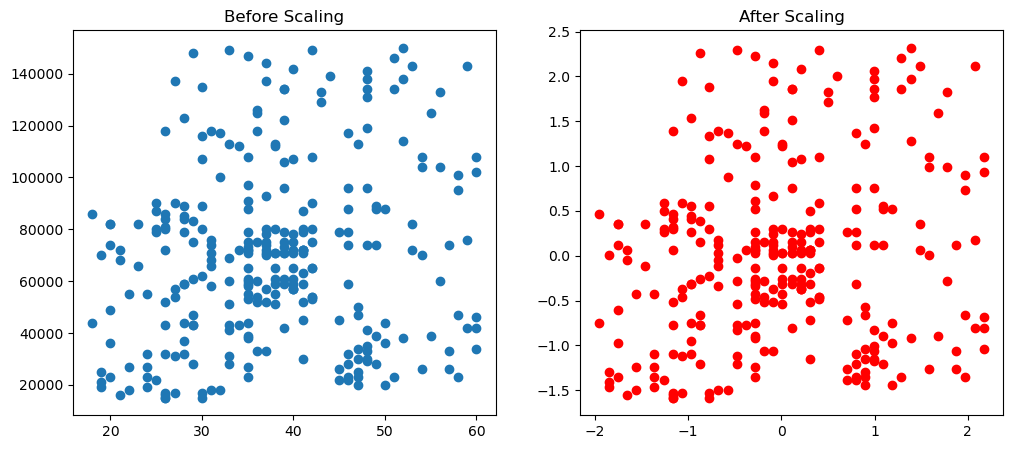

In [ ]:
 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

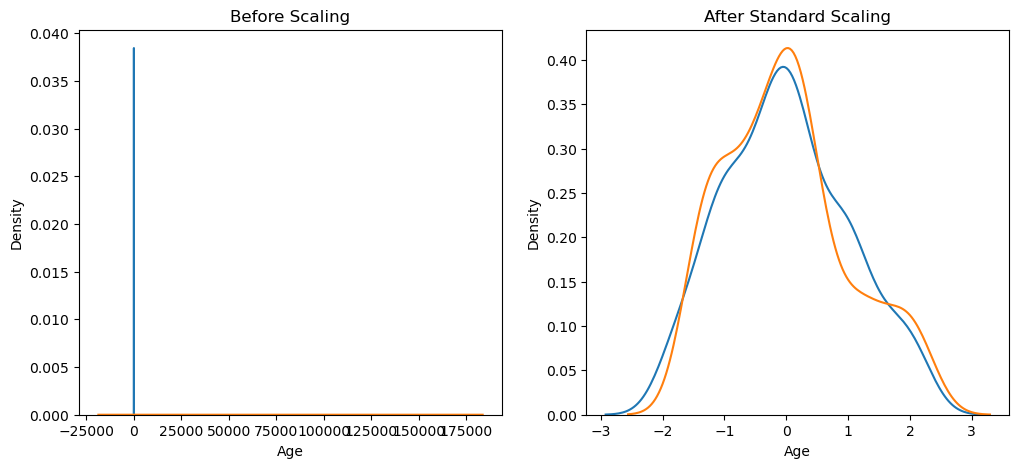

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

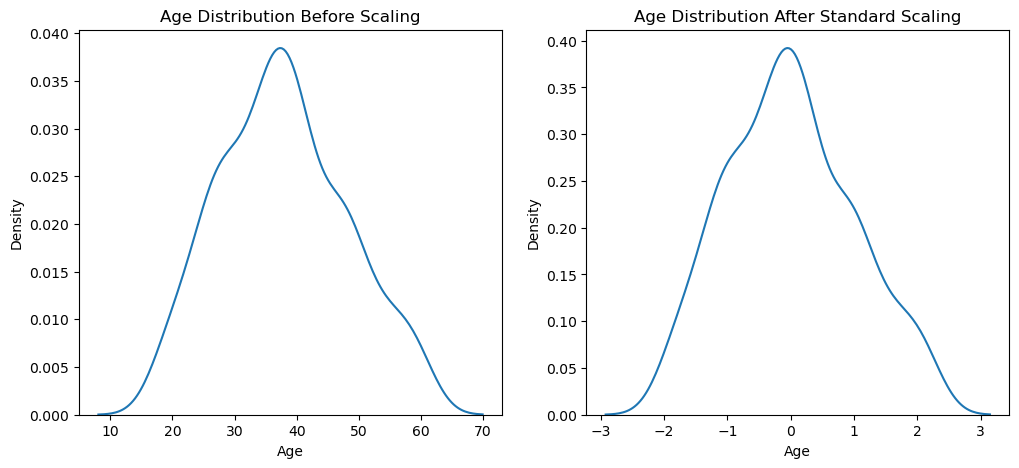

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

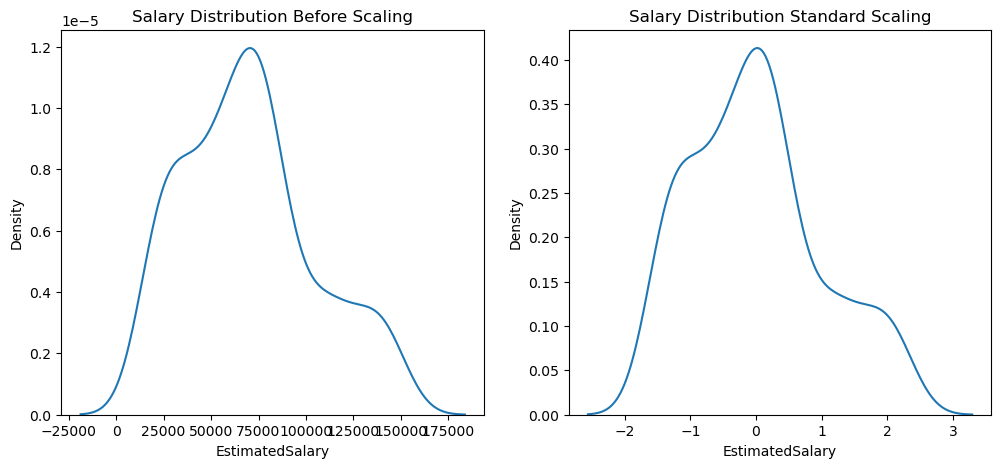

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important?

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [23]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()